In [2]:
import numpy as np
from scipy.stats import norm

Exercise 1

In [3]:
import numpy as np
from scipy.stats import t

# Step 1: Generate data
n_sample = 100
uniform_random_numbers = np.random.rand(n_sample)
samples = np.exp(uniform_random_numbers)

# Step 2: Compute mean and sample std
sample_mean = np.mean(samples)
sample_std = np.std(samples, ddof=1)

# Step 3: t-critical value for 95% CI
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n_sample - 1)

# Step 4: Margin of error and confidence interval
margin_error = t_crit * sample_std / np.sqrt(n_sample)
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

# Output
print(f'Estimated value: {sample_mean:.4f}')
print(f'True value: {np.e - 1:.4f}')
print(f'95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]')


Estimated value: 1.7444
True value: 1.7183
95% Confidence Interval: [1.6419, 1.8468]


Exercise 2

In [4]:
# Sample size
n = 100

# Generate uniform samples and apply antithetic method
u = np.random.rand(n)
y = (np.exp(u) + np.exp(1 - u)) / 2

# Estimate mean and std
mean_y = np.mean(y)
std_y = np.std(y, ddof=1)

# Critical value for 95% CI
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n - 1)

# Compute confidence interval
margin_error = t_crit * std_y / np.sqrt(n)
ci_lower = mean_y - margin_error
ci_upper = mean_y + margin_error

# Output
print(f"Estimated value (antithetic): {mean_y:.4f}")
print(f"True value: {np.e - 1:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Estimated value (antithetic): 1.7161
True value: 1.7183
95% Confidence Interval: [1.7039, 1.7284]


Exercise 3

In [5]:
# Sample size
n = 100

# Uniform samples
u = np.random.rand(n)

# Compute control variate coefficient
c = -np.cov(np.exp(u), u)[0, 1] / np.var(u)
print(c)

theoretical_c = -((3-np.e)/2)/(1/12)
print(theoretical_c)

# Control variate estimator
z = np.exp(u) + c * (u - 0.5)

# Sample mean and standard deviation
mean_z = np.mean(z)
std_z = np.std(z, ddof=1)

# Critical value for 95% CI
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n - 1)

# Compute confidence interval
margin_error = t_crit * std_z / np.sqrt(n)
ci_lower = mean_z - margin_error
ci_upper = mean_z + margin_error

# Output
print(f"Estimated value (control variates): {mean_z:.4f}")
print(f"True value: {np.e - 1:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


-1.7468981649907784
-1.6903090292457295
Estimated value (control variates): 1.7120
True value: 1.7183
95% Confidence Interval: [1.7009, 1.7231]


Exercise 4

In [7]:
# Sample size per stratum
n_sample = 10
strata = 10

w = np.zeros(10)
for j in range(10):
    samples = [np.exp(np.random.uniform(i/strata, (i + 1)/strata)) for i in range(strata)]
    w[j] = np.sum(samples) / n_sample

w_mean = np.mean(w)
w_var = np.var(w, ddof = 1)

alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=len(w) - 1)
margin_error = t_crit * np.sqrt(w_var) / np.sqrt(len(w))
ci_lower = w_mean - margin_error
ci_upper = w_mean + margin_error
exact_int = np.e - 1

print(f"Estimated integral (stratified): {w_mean:.4f}")
print(f"Exact integral: {exact_int:.4f}")
print(f"95% Confidence Interval for w_mean: [{ci_lower:.4f}, {ci_upper:.4f}]")

Estimated integral (stratified): 1.7215
Exact integral: 1.7183
95% Confidence Interval for w_mean: [1.7093, 1.7338]


Exercise 5

In [ ]:
import numpy as np
import math
from scipy.stats import t
import matplotlib.pyplot as plt

# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions = np.zeros(n_sim)
block_Z = np.zeros(n_sim)
mean_arr_times = np.zeros(n_sim)

for j in range(n_sim):
    n_custom = 10000
    n = 0

    interval_between_arrivals = np.random.exponential(scale = mtbc, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)
    mean_arr_times[j] = np.mean(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction

# Exact solution
A = mst * mtbc
m_vect = np.arange(0,m+1)
denominator = np.sum(A**m_vect / [math.factorial(k) for k in m_vect])
B = A**m/math.factorial(m) / denominator

print(f'exact solution: {B*100}%')

# Confidence interval

theta_hat = np.sum(block_fractions)/n_sim
#print(theta_hat)
#sigma_2 = (np.sum(block_fractions ** 2) - n_sim * theta_hat**2) / (n_sim -1)
# Compute theta_hat, the mean of block fractions
theta_hat = np.mean(block_fractions)

# Unbiased sample variance estimate of the estimator
sigma_2 = np.var(block_fractions, ddof=1)

dof = n_sim - 1
alpha = 0.05
t_quant = t.ppf(1 - alpha/2, dof)

# Standard error uses number of replications n_sim
CI = [
    theta_hat - np.sqrt(sigma_2) / np.sqrt(n_sim) * t_quant,
    theta_hat + np.sqrt(sigma_2) / np.sqrt(n_sim) * t_quant
]

print(f'Confidence interval for standard method: {CI}')

# Control variate calculations
c = - np.cov(block_fractions, mean_arr_times, ddof=1)[0, 1] / np.var(mean_arr_times, ddof=1)
Z = block_fractions + c * (mean_arr_times - mtbc)

Z_cv = np.mean(Z)
Z_var = np.var(Z, ddof=1)

# Confidence interval for control variate
CI_cv = [
    Z_cv - np.sqrt(Z_var) / np.sqrt(n_sim) * t_quant,
    Z_cv + np.sqrt(Z_var) / np.sqrt(n_sim) * t_quant
]

print(f'Confidence interval for control variate: {CI_cv}')
print(f'Original variance: {sigma_2}, Control variate variance: {Z_var}')
print(f"Amplitude of CI:\n Without CV: {CI[1] - CI[0]}\n With CV: {CI_cv[1] - CI_cv[0]}")

Estimated value: 12.10931333163849
0.5640003334566752
0.568381
78.73123198328217


Exercise 6

In [ ]:
import numpy as np
from scipy.stats import t

# Parameters
m = 10
mst = 8
mtbc = 1
n_sim = 100
n_custom = 10000

p1 = 0.8
p2 = 0.2
lam1 = 0.8333
lam2 = 5.0
alpha = 0.05

# --- WITHOUT COMMON RANDOM NUMBERS ---
block_fractions_exp = np.zeros(n_sim)
block_fractions_hyp = np.zeros(n_sim)

# First simulate exponential system
for j in range(n_sim):
    uniform_exp = np.random.rand(n_custom)
    interval_exp = -np.log(uniform_exp) / mtbc
    arrival_times_exp = np.cumsum(interval_exp)
    service_in_use_times = np.zeros(m)
    n_cust_blocked = 0
    for n in range(n_custom):
        available = np.where(arrival_times_exp[n] >= service_in_use_times)[0]
        if len(available) > 0:
            i = available[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_exp[n] + service_time
        else:
            n_cust_blocked += 1
    block_fractions_exp[j] = n_cust_blocked / n_custom * 100

# Then simulate hyperexponential system
for j in range(n_sim):
    uniform_hyp = np.random.rand(n_custom)
    exps = np.random.choice([0, 1], p=[p1, p2], size=n_custom)
    interval_hyp = np.zeros(n_custom)
    interval_hyp[exps == 0] = -np.log(uniform_hyp[exps == 0]) / lam1
    interval_hyp[exps == 1] = -np.log(uniform_hyp[exps == 1]) / lam2
    arrival_times_hyp = np.cumsum(interval_hyp)
    service_in_use_times = np.zeros(m)
    n_cust_blocked = 0
    for n in range(n_custom):
        available = np.where(arrival_times_hyp[n] >= service_in_use_times)[0]
        if len(available) > 0:
            i = available[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_hyp[n] + service_time
        else:
            n_cust_blocked += 1
    block_fractions_hyp[j] = n_cust_blocked / n_custom * 100

# Compute statistics and CI for NO CRN
diff_no_crn = block_fractions_exp - block_fractions_hyp
theta_hat_no_crn = np.mean(diff_no_crn)
sigma2_no_crn = np.var(diff_no_crn, ddof=1)
dof = n_sim - 1
t_quant = t.ppf(1 - alpha/2, dof)
CI_no_crn = [
    theta_hat_no_crn - np.sqrt(sigma2_no_crn) / np.sqrt(n_sim) * t_quant,
    theta_hat_no_crn + np.sqrt(sigma2_no_crn) / np.sqrt(n_sim) * t_quant
]
print('NO CRN:')
print('Mean difference:', theta_hat_no_crn)
print('Variance of estimator:', sigma2_no_crn)
print('Confidence interval:', CI_no_crn)
print(f'Width CI: {CI_no_crn[1] - CI_no_crn[0]:.4f}')

# --- WITH COMMON RANDOM NUMBERS ---
block_fractions_exp = np.zeros(n_sim)
block_fractions_hyp = np.zeros(n_sim)

for j in range(n_sim):
    uniform = np.random.rand(n_custom)
    exps = np.random.choice([0, 1], p=[p1, p2], size=n_custom)
    # Exponential arrivals
    interval_exp = -np.log(uniform) / mtbc
    arrival_times_exp = np.cumsum(interval_exp)
    # Hyperexponential arrivals
    interval_hyp = np.zeros(n_custom)
    interval_hyp[exps == 0] = -np.log(uniform[exps == 0]) / lam1
    interval_hyp[exps == 1] = -np.log(uniform[exps == 1]) / lam2
    arrival_times_hyp = np.cumsum(interval_hyp)

    # Simulate exponential system
    service_in_use_times = np.zeros(m)
    n_cust_blocked = 0
    for n in range(n_custom):
        available = np.where(arrival_times_exp[n] >= service_in_use_times)[0]
        if len(available) > 0:
            i = available[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_exp[n] + service_time
        else:
            n_cust_blocked += 1
    block_fractions_exp[j] = n_cust_blocked / n_custom * 100

    # Simulate hyperexponential system
    service_in_use_times = np.zeros(m)
    n_cust_blocked = 0
    for n in range(n_custom):
        available = np.where(arrival_times_hyp[n] >= service_in_use_times)[0]
        if len(available) > 0:
            i = available[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_hyp[n] + service_time
        else:
            n_cust_blocked += 1
    block_fractions_hyp[j] = n_cust_blocked / n_custom * 100

# Compute statistics and CI for CRN
diff_crn = block_fractions_exp - block_fractions_hyp
theta_hat_crn = np.mean(diff_crn)
sigma2_crn = np.var(diff_crn, ddof=1)
CI_crn = [
    theta_hat_crn - np.sqrt(sigma2_crn) / np.sqrt(n_sim) * t_quant,
    theta_hat_crn + np.sqrt(sigma2_crn) / np.sqrt(n_sim) * t_quant
]
print('\nWITH CRN:')
print('Mean difference:', theta_hat_crn)
print('Variance of estimator:', sigma2_crn)
print('Confidence interval:', CI_crn)
print(f'Width CI: {CI_crn[1] - CI_crn[0]:.4f}')


Confidence interval: ('0.03650097158164387', '0.03749902841835633')
Widht CI: 0.0009980568367124604
11.985000000000001
12.021999999999998


Exercise 7

In [ ]:
n_sample = 1000

z = np.random.randn(n_sample)

a = 4
print("a = ", a)

prob = np.sum(z > a) / n_sample
print("Crude estimator: ", prob)
crude_var = np.var(z>a, ddof=1)  # unbiased sample variance
print("Variance of crude estimator:", crude_var)

# Importance sampling: sample from N(a, sigma_2)
z_imp = np.random.normal(loc=a, scale=np.sqrt(sigma_2), size=n_sample)
weights = norm.pdf(z_imp) / norm.pdf(z_imp, loc=a, scale=np.sqrt(sigma_2))
prob_imp = np.mean((z_imp > a) * weights)
print("IS Estimator", prob_imp)
is_var = np.var((z_imp > a) * weights, ddof = 1)
print("Variance of IS estimator:", is_var)

print("Theoretical probability: ",(1 - norm.cdf(a)))

0.171
0.1895596277722878
0.18406012534675953


Exercise 8

In [23]:
from scipy.stats import norm

n_samples = 100
lam = 1.3
x = np.random.exponential(scale=1/lam,size = n_samples)
alpha = 0.05
g = lam * np.exp(-lam*x)
sample = (x<=1) * np.exp(x)/g
mean = np.mean(sample)
std = np.std(sample, ddof=1)
z = norm.ppf(1 - alpha/2)
ci_lower = mean - z * std / np.sqrt(n_samples)
ci_upper = mean + z * std / np.sqrt(n_samples)

int_is = mean
error = exact_int - int

print(f'Estimated integral: {int_is}, Exact integral: {exact_int}, Error: {np.abs(error)}')
print(f'95% Confidence interval: [{ci_lower}, {ci_upper}]')
var_estimator = np.var(sample, ddof=1)
print("Variance of the estimator (IS):", var_estimator)


Estimated integral: 1.5794342405423873, Exact integral: 1.718281828459045, Error: 0.05469621517537293
95% Confidence interval: [1.2608434350431028, 1.8980250460416719]
Variance of the estimator (IS): 2.6422280203004376


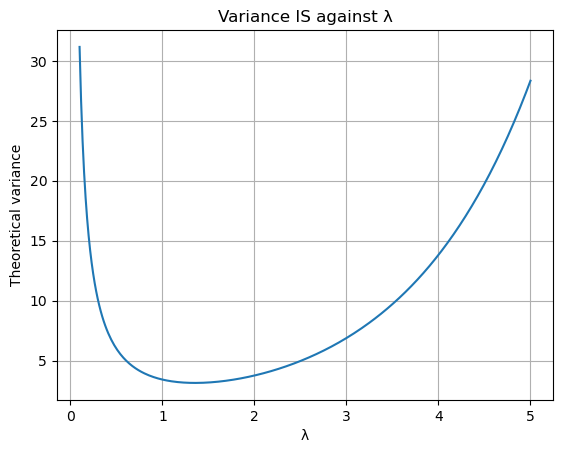

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

lambdas = np.linspace(0.1, 5, 300)
f = (np.exp(lambdas + 2) - 1) / (lambdas * (lambdas + 2)) - (np.e - 1)**2

plt.plot(lambdas, f)
plt.xlabel("λ")
plt.ylabel("Theoretical variance")
plt.title("Variance IS against λ")
plt.grid(True)
plt.show()

Exercise 9

In [14]:
from scipy.stats import pareto

import matplotlib.pyplot as plt

# Parameters for the Pareto distribution
b = 2.62  # shape parameter
size = 1000

# Generate Pareto samples
pareto_samples = pareto.rvs(b, size=size)

mean_par = np.mean(pareto_samples)
print(mean_par)



1.605939555671388
